In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing clean dataset

In [2]:
full_dataset = pd.read_csv("D:/programming/full_datasetpy.csv")
plane_data = pd.read_csv("D:/programming/dataverse_files/plane_data.csv")

## Subsetting only necessary columns

In [5]:
full_dataset = full_dataset[["Year","ArrDelay","DepDelay", "CRSArrTime", "CRSDepTime","TailNum"]]
plane_data = plane_data[["year","tailnum"]]

## merging the plane and clean dataset by tail number

In [7]:
plane_data.rename(
    columns={"year":"yearofmanu",
                "tailnum":"TailNum"}
          ,inplace=True)

In [8]:
merged_set = full_dataset.merge(plane_data, how = 'right')

In [9]:
merged_set = merged_set.dropna()

In [10]:
merged_set.head()

,Year,ArrDelay,DepDelay,CRSArrTime,CRSDepTime,TailNum,yearofmanu
0,2005.0,-1.0,2.0,1705.0,1545.0,N10156,2004
1,2005.0,33.0,10.0,1342.0,1135.0,N10156,2004
2,2005.0,11.0,-8.0,1005.0,900.0,N10156,2004
3,2005.0,42.0,48.0,1023.0,630.0,N10156,2004
4,2005.0,31.0,-4.0,1710.0,1530.0,N10156,2004


## converting year of manufacture to float

In [11]:
merged_set['yearofmanu'] = pd.to_numeric(merged_set['yearofmanu'], errors = 'coerce')

In [12]:
merged_set.dtypes

Year          float64
ArrDelay      float64
DepDelay      float64
CRSArrTime    float64
CRSDepTime    float64
TailNum        object
yearofmanu    float64
dtype: object

## Taking only the years that are relevant

In [13]:
merged_set = merged_set[(merged_set.yearofmanu >= 1956) & (merged_set.yearofmanu <= 2006)]

In [14]:
merged_set.head()

,Year,ArrDelay,DepDelay,CRSArrTime,CRSDepTime,TailNum,yearofmanu
0,2005.0,-1.0,2.0,1705.0,1545.0,N10156,2004.0
1,2005.0,33.0,10.0,1342.0,1135.0,N10156,2004.0
2,2005.0,11.0,-8.0,1005.0,900.0,N10156,2004.0
3,2005.0,42.0,48.0,1023.0,630.0,N10156,2004.0
4,2005.0,31.0,-4.0,1710.0,1530.0,N10156,2004.0


In [15]:
mean_delay = (merged_set["ArrDelay"] + merged_set["DepDelay"]) / 2
merged_set["mean_delay"] = mean_delay

## finding if older planes delayed more

In [16]:
delay_by_year = merged_set[["yearofmanu","mean_delay"]]
delay_by_year = delay_by_year.groupby(['yearofmanu']).mean()

In [17]:
delay_by_year.head()

,mean_delay
yearofmanu,
1956.0,8.271140
1957.0,3.705226
1959.0,9.348733
1962.0,8.393275
1963.0,8.061177


In [18]:
delay_by_year = delay_by_year.reset_index()

In [19]:
delay_by_year.head()

,yearofmanu,mean_delay
0,1956.0,8.271140
1,1957.0,3.705226
2,1959.0,9.348733
3,1962.0,8.393275
4,1963.0,8.061177


## Data visualisation using scatter plot and line of best fit

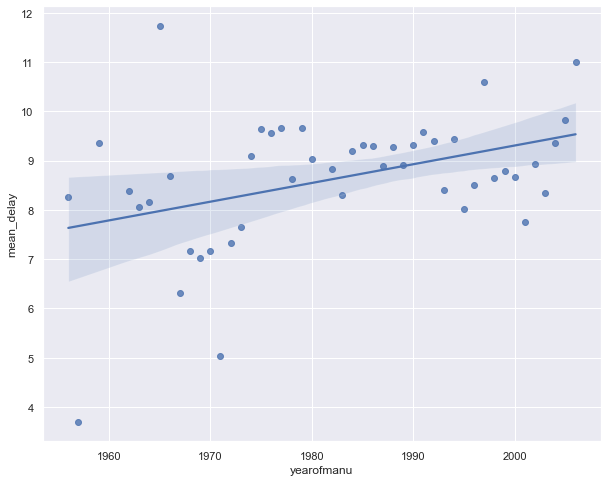

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x="yearofmanu", y="mean_delay", data=delay_by_year)
plt.savefig('regplotq2.png')

In [ ]:
np.corrcoef(delay_by_year['mean_delay'], delay_by_year['yearofmanu'])